In [ ]:
# 以下都是例行公事，直接拷贝即可

import pandas as pd
import numpy as np 

# 导入matplotlib.pyplot绘图库，其中plt.plot()是最常用的绘图函数之一
import matplotlib.pyplot as plt 

import seaborn as sns

sns.set_theme() # 默认用seaborn的绘图样式

plt.rcParams["font.sans-serif"]=["Microsoft YaHei"] #设置字体。如果不设置，中文会乱码。这里采用微软雅黑'Microsoft YaHei'，如果显示不正常，也可以使用黑体'SimHei'或者宋体'SimSun'等
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

# 绘图使用'svg'后端：svg是矢量格式，可以任意缩放均保持清晰，各种屏幕的显示良好。
%config InlineBackend.figure_formats = ['svg']

In [5]:
import pandas as pd
import numpy as np

titanic_df = pd.read_csv('data/titanic.csv')
titanic_df.iloc[:5] # 查看前5行

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


题目1：绘制不同仓等、不同年龄组（每10岁一组，如20到29岁是一组）的生存率折线图。

提示：横轴是年龄组，纵轴是生存率，有3条折线表示3个仓等。

In [8]:
# 思考：
# 1. 要求绘制折线图，且有3条线，因此最后构造的数据应该有3列
# 2. 所以要构造的数据：index是年龄组，y是生存率，分组是仓等

# 1. 计算每个人属于哪个年龄组

titanic_df['age_group'] = titanic_df["age"] // 10
titanic_df[:5]



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,2.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,3.0


In [24]:
# 2. 把生存列转为数值

titanic_df['alive2'] = titanic_df['alive'] == 'yes'

titanic_df['alive2']

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: alive2, Length: 891, dtype: bool

In [ ]:
# 3. 按年龄组和仓等分组，计算生存率
df = titanic_df.groupby(['age_group','class'])['alive2'].mean()
df

age_group  class 
0.0        First     0.666667
           Second    1.000000
           Third     0.452381
1.0        First     0.833333
           Second    0.500000
           Third     0.257576
2.0        First     0.705882
           Second    0.415094
           Third     0.233083
3.0        First     0.780000
           Second    0.395833
           Third     0.217391
4.0        First     0.594595
           Second    0.555556
           Third     0.058824
5.0        First     0.555556
           Second    0.333333
           Third     0.000000
6.0        First     0.307692
           Second    0.333333
           Third     0.333333
7.0        First     0.000000
           Second    0.000000
           Third     0.000000
8.0        First     1.000000
Name: alive2, dtype: float64

In [28]:
# 长数据转宽数据
df.unstack()

class,First,Second,Third
age_group,,,
0.0,0.666667,1.000000,0.452381
1.0,0.833333,0.500000,0.257576
2.0,0.705882,0.415094,0.233083
3.0,0.780000,0.395833,0.217391
4.0,0.594595,0.555556,0.058824
5.0,0.555556,0.333333,0.000000
6.0,0.307692,0.333333,0.333333
7.0,0.000000,0.000000,0.000000
8.0,1.000000,NaN,NaN


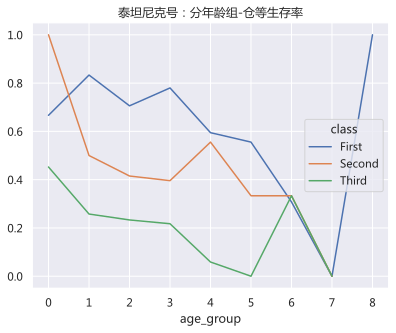

In [ ]:
# 长数据转宽数据
df.unstack().plot()
plt.title('泰坦尼克号：分年龄组-仓等生存率');
# 注意：80+

In [ ]:
# 注意到，头等舱80岁的幸存率100%
titanic_df.groupby(['age_group','class'])['alive2'].count()
# 检查一个样本数量，只有1人且存活。

age_group  class 
0.0        First       3
           Second     17
           Third      42
1.0        First      18
           Second     18
           Third      66
2.0        First      34
           Second     53
           Third     133
3.0        First      50
           Second     48
           Third      69
4.0        First      37
           Second     18
           Third      34
5.0        First      27
           Second     15
           Third       6
6.0        First      13
           Second      3
           Third       3
7.0        First       3
           Second      1
           Third       2
8.0        First       1
Name: alive2, dtype: int64

题目2：绘制年龄和票价（Fare）的散点图，区分乘客的性别（Sex），票价采用对数坐标。

提示：在散点图中，不同类别采用不同的颜色，需要大家自行探索。

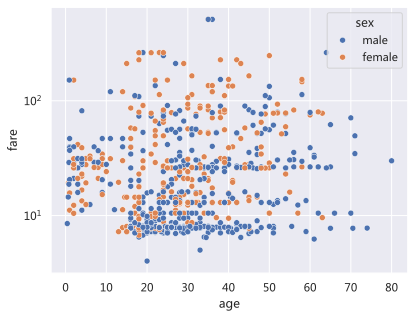

In [51]:
# 用seaborn可以一次性完成
import seaborn as sns
sns.scatterplot(data=titanic_df, 
                x='age', 
                y='fare', 
                hue='sex')
plt.yscale('log')
plt.show()

<Axes: xlabel='age', ylabel='fare'>

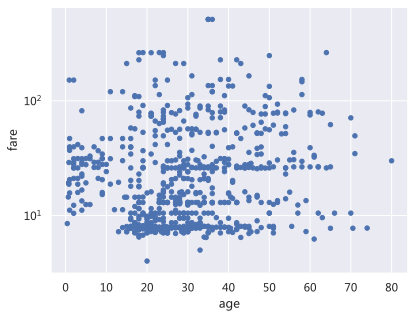

In [ ]:
# 如果不使用seaborn，先看默认绘图
titanic_df.plot.scatter(x = 'age', y = "fare", logy=True)

<Axes: xlabel='age', ylabel='fare'>

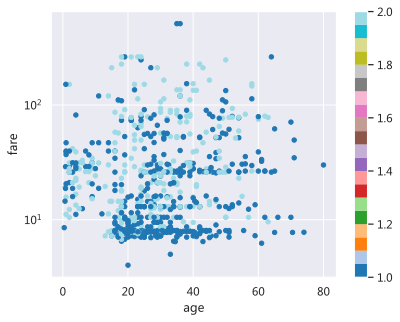

In [ ]:
# 方法1：
# 把性别转为数字编码，
sex_to_color = {'male':1, 'female':2}

# titanic_df['sex'].map(sex_to_color) # 创建一列，男性为1，女性为2
# 把这一列赋予颜色参数c
# cmap指定调色板：可以搜索“matplotlib cmap列表”

titanic_df.plot.scatter(x = 'age', y = "fare", logy=True, c = titanic_df['sex'].map(sex_to_color),
                        cmap = 'tab20')

In [64]:
# 其他方法，比如分男性和女性子集分开绘制，略



题目3：绘制男性和女性乘客的年龄分布图和密度图。

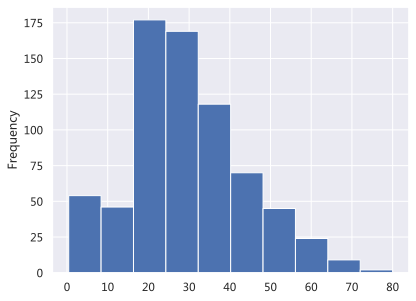

In [ ]:
# 全体年龄分布
titanic_df['age'].plot.hist();

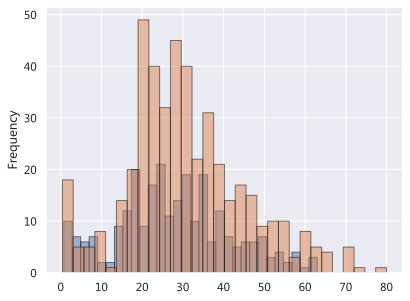

In [ ]:
# 先分组，再绘制
titanic_df.groupby('sex')['age'].plot.hist(bins=30,alpha=0.5,ec='black');

<Axes: xlabel='age', ylabel='Count'>

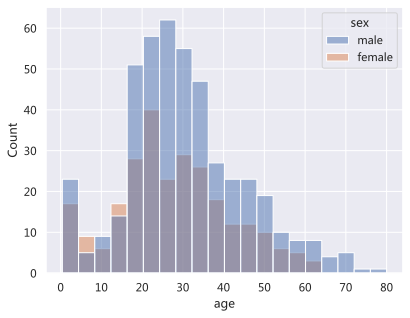

In [ ]:
import seaborn as sns

# 方法2：使用 seaborn
sns.histplot(data=titanic_df, 
             x='age',           # 要统计的数据
             hue='sex',         # 分组列
             multiple="layer",   # 图层叠加方式：'layer'重叠, 'stack'堆叠
             alpha=0.5)

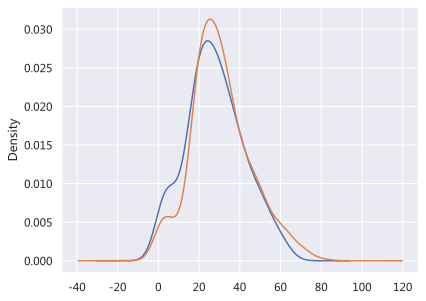

In [79]:
# 密度也是类似，再绘制
titanic_df.groupby('sex')['age'].plot.density();

<Axes: xlabel='age', ylabel='Density'>

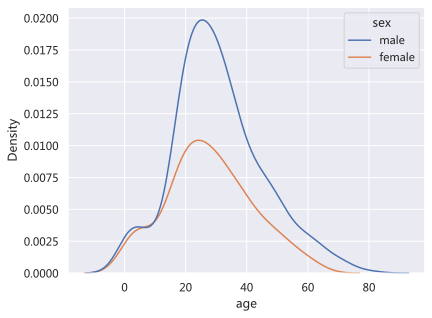

In [83]:

# 方法2：使用 seaborn
sns.kdeplot(data=titanic_df, 
             x='age',           # 要统计的数据
             hue='sex',         # 分组列
             multiple="layer",   # 图层叠加方式：'layer'重叠, 'stack'堆叠
             )

题目4：计算不同舱位乘客的生还率，并绘制条形图。

In [ ]:
# 仓位生存率
titanic_df.groupby('class')['alive2'].mean()

class
First     0.629630
Second    0.472826
Third     0.242363
Name: alive2, dtype: float64

<Axes: xlabel='class'>

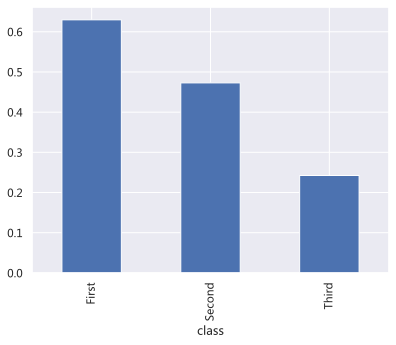

In [ ]:
titanic_df.groupby('class')['alive2'].mean().plot.bar()


题目5：计算并绘制登船港口（Embarked）的乘客分布饼图。

In [92]:
# 计算不同港口登船的人数
# 按港口分组，随便取一列，计算数量
titanic_df.groupby('embark_town')['who'].count()

embark_town
Cherbourg      168
Queenstown      77
Southampton    644
Name: who, dtype: int64

<Axes: ylabel='who'>

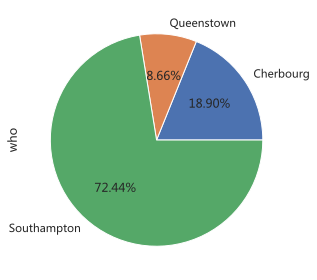

In [ ]:
titanic_df.groupby('embark_town')['who'].count().plot.pie(autopct = '%.2f%%')